In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
ins_df=pd.read_csv('D:\\ANALYTICS\\GREAT LEARNING\\16.Data Mining-Week-5\\insurance_part2_data-2.csv')

<b>2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check,<br/> 
write an inference on it.</b>

In [4]:
ins_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [5]:
ins_df.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


In [6]:
ins_df.describe(include='all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


From summary of variables we could see Duration gets a value -1.As per data dictionary give Duration is <br/>
duration of the trip hence time cannot be negative.We could avoid taking the single  data point among the 3000<br/>
observations

In [7]:
ins_df.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [8]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [9]:
dups=ins_df.duplicated()

In [10]:
ins_df[dups]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [11]:
ins_df.drop_duplicates(inplace=True)

In [12]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   object 
 2   Type          2861 non-null   object 
 3   Claimed       2861 non-null   object 
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   object 
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   object 
 9   Destination   2861 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 245.9+ KB


In [13]:
ins_df.describe()

,Age,Commision,Duration,Sales
count,2861.000000,2861.000000,2861.000000,2861.000000
mean,38.204124,15.080996,72.120238,61.757878
std,10.678106,25.826834,135.977200,71.399740
min,8.000000,0.000000,-1.000000,0.000000
25%,31.000000,0.000000,12.000000,20.000000
50%,36.000000,5.630000,28.000000,33.500000
75%,43.000000,17.820000,66.000000,69.300000
max,84.000000,210.210000,4580.000000,539.000000


In [14]:
df=ins_df[ins_df['Duration']==-1].index

In [15]:
ins_df.drop(df,inplace=True)

In [16]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2860 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2860 non-null   int64  
 1   Agency_Code   2860 non-null   object 
 2   Type          2860 non-null   object 
 3   Claimed       2860 non-null   object 
 4   Commision     2860 non-null   float64
 5   Channel       2860 non-null   object 
 6   Duration      2860 non-null   int64  
 7   Sales         2860 non-null   float64
 8   Product Name  2860 non-null   object 
 9   Destination   2860 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 245.8+ KB


In [17]:
ins_df.describe()

,Age,Commision,Duration,Sales
count,2860.000000,2860.000000,2860.000000,2860.000000
mean,38.208741,15.084066,72.145804,61.773178
std,10.677117,25.830828,135.994100,71.407535
min,8.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,12.000000,20.000000
50%,36.000000,5.630000,28.000000,33.500000
75%,43.000000,17.820000,66.000000,69.300000
max,84.000000,210.210000,4580.000000,539.000000


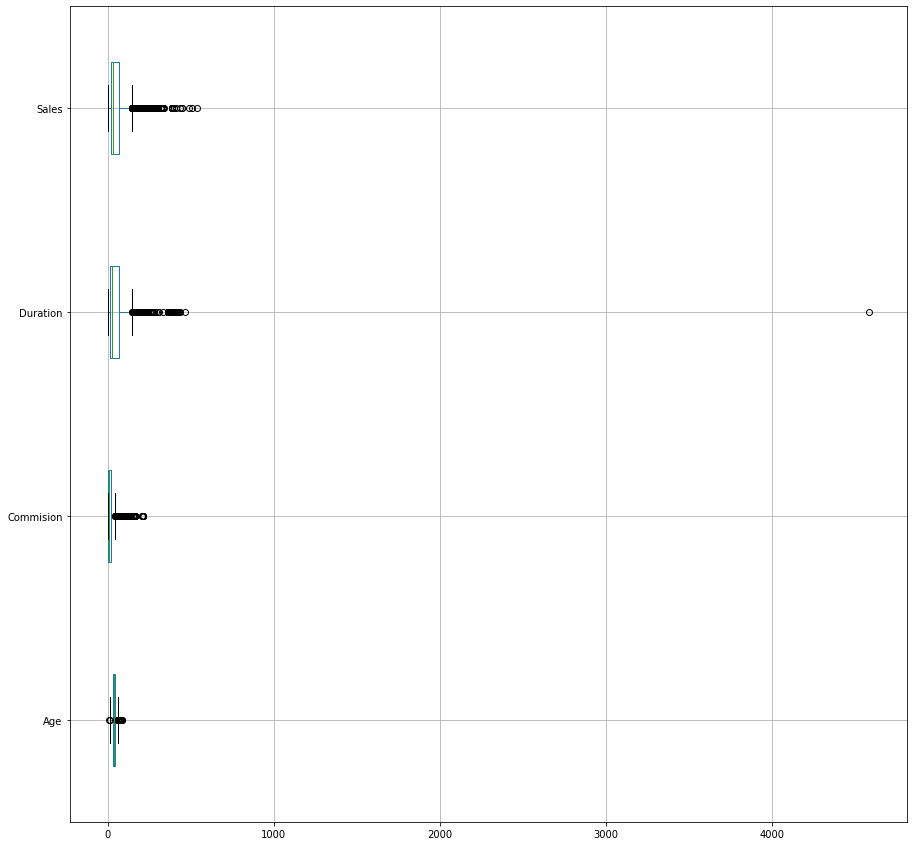

In [18]:
plt.figure(figsize=(15,15))
ins_df[['Age','Commision','Duration','Sales']].boxplot(vert=0)

Decision Tree,Random Forest are most robust to outlier whereas Neural network's robustness can be stepped up by<br/>
increasing the no:of hidden layers used and usage of activation function.So for this problem,outlier treatment is avoided

In [19]:
for feature in ins_df.columns:
    if ins_df[feature].dtype=='object':
        ins_df[feature]=pd.Categorical(ins_df[feature]).codes

In [20]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2860 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2860 non-null   int64  
 1   Agency_Code   2860 non-null   int8   
 2   Type          2860 non-null   int8   
 3   Claimed       2860 non-null   int8   
 4   Commision     2860 non-null   float64
 5   Channel       2860 non-null   int8   
 6   Duration      2860 non-null   int64  
 7   Sales         2860 non-null   float64
 8   Product Name  2860 non-null   int8   
 9   Destination   2860 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 128.5 KB


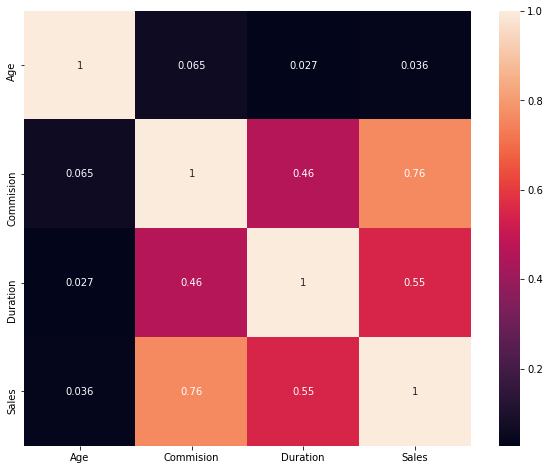

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(ins_df[['Age','Commision','Duration','Sales']].corr(),annot=True)

As we could see from Heatmap Magnitude of correlation between features is not much significant.

<br/>

<b>2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, <br/>
Artificial Neural Network</b>

In [22]:
x=ins_df.drop('Claimed',axis=1)
y=ins_df.pop('Claimed')

In [23]:
x_train,x_test,train_labels,test_labels=train_test_split(x,y,test_size=.30,random_state=1)

In [24]:
x_train.shape,x_test.shape

((2002, 9), (858, 9))

# Decision Tree Classifier

In [81]:
param_grid={
    'criterion': ['gini'],
    'max_depth': [10,15],
    'min_samples_leaf': [15,20,25], 
    'min_samples_split': [45,50,60]
}
dcl=DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dcl, param_grid = param_grid, cv = 5)

In [82]:
grid_search.fit(x_train, train_labels)
print(grid_search.best_params_)
dclf_model = grid_search.best_estimator_
dclf_model

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 25, 'min_samples_split': 45}


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=45,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [83]:
print (pd.DataFrame(dclf_model.feature_importances_, columns = ["Feature_imp"], index = x_train.columns).sort_values('Feature_imp',ascending=False))

              Feature_imp
Agency_Code      0.500377
Sales            0.260399
Duration         0.074576
Commision        0.066295
Product Name     0.040006
Age              0.035591
Destination      0.022756
Type             0.000000
Channel          0.000000


# Random Forest Classfier

In [96]:
param_grid = {
    'max_depth': [10,11,12],
    'max_features': [4,5,6],
    'min_samples_leaf': [10,11,12],
    'min_samples_split': [35,40,45],
    'n_estimators': [300]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv =10)

In [97]:
grid_search.fit(x_train, train_labels)
print(grid_search.best_params_)
rf_model = grid_search.best_estimator_
rf_model

{'max_depth': 11, 'max_features': 6, 'min_samples_leaf': 12, 'min_samples_split': 35, 'n_estimators': 300}


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=35,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [98]:
print (pd.DataFrame(rf_model.feature_importances_, columns = ["Feature_imp"], index = x_train.columns).sort_values('Feature_imp',ascending=False))

              Feature_imp
Agency_Code      0.317959
Sales            0.208435
Product Name     0.170352
Duration         0.105533
Commision        0.089796
Age              0.069579
Type             0.019531
Destination      0.016911
Channel          0.001906


<br/>

# Neural Network

In [99]:
sc=StandardScaler()

In [100]:
sc_x_train=sc.fit_transform(x_train)

In [101]:
sc_x_test=sc.transform(x_test)

In [102]:
param_grid = {
    'hidden_layer_sizes': [(200,200,200)], 
    'max_iter': [10000], 
    'solver': ['sgd','adam'], 
    'tol': [0.01,0.1], 
    'activation':['logistic','relu']
}

nncl = MLPClassifier()

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [103]:
grid_search.fit(sc_x_train, train_labels)
print(grid_search.best_params_)
ann_model = grid_search.best_estimator_
ann_model

{'activation': 'relu', 'hidden_layer_sizes': (200, 200, 200), 'max_iter': 10000, 'solver': 'adam', 'tol': 0.1}


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(200, 200, 200), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.1, validation_fraction=0.1, verbose=False,
              warm_start=False)

<br/>

<b>2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using <br/>
Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model</b>

# <b>Cart Model-DecisionTree</b>

Train

In [104]:
ytrain_predict = dclf_model.predict(x_train)
ytest_predict = dclf_model.predict(x_test)

In [105]:
confusion_matrix(train_labels, ytrain_predict)

array([[1148,  195],
       [ 223,  436]], dtype=int64)

In [106]:
cart_train_acc=dclf_model.score(x_train,train_labels) 
cart_train_acc

0.7912087912087912

In [107]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
cart_metrics

{'0': {'precision': 0.8373450036469731,
  'recall': 0.8548026805658973,
  'f1-score': 0.8459837877671335,
  'support': 1343},
 '1': {'precision': 0.6909667194928685,
  'recall': 0.661608497723824,
  'f1-score': 0.6759689922480621,
  'support': 659},
 'accuracy': 0.7912087912087912,
 'macro avg': {'precision': 0.7641558615699208,
  'recall': 0.7582055891448607,
  'f1-score': 0.7609763900075978,
  'support': 2002},
 'weighted avg': {'precision': 0.7891615424793631,
  'recall': 0.7912087912087912,
  'f1-score': 0.7900198765548117,
  'support': 2002}}

In [108]:
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][0],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)
print('cart_accuracy',cart_train_acc)

cart_train_precision  0.69
cart_train_recall  0.66
cart_train_f1  0.68
cart_accuracy 0.7912087912087912


AUC: 0.849


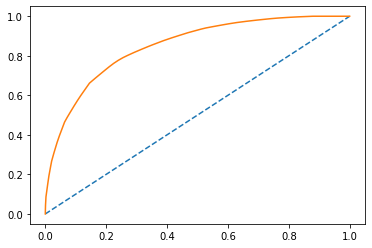

In [109]:
# predict probabilities
probs =dclf_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

<br/>

Test

In [110]:
confusion_matrix(test_labels, ytest_predict)

array([[494, 109],
       [110, 145]], dtype=int64)

In [111]:
cart_test_acc=dclf_model.score(x_test,test_labels)
cart_test_acc

0.7447552447552448

In [112]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       603
           1       0.57      0.57      0.57       255

    accuracy                           0.74       858
   macro avg       0.69      0.69      0.69       858
weighted avg       0.74      0.74      0.74       858



In [115]:
classification_report(test_labels, ytest_predict,output_dict=True)

{'0': {'precision': 0.8178807947019867,
  'recall': 0.8192371475953566,
  'f1-score': 0.8185584092792046,
  'support': 603},
 '1': {'precision': 0.5708661417322834,
  'recall': 0.5686274509803921,
  'f1-score': 0.5697445972495088,
  'support': 255},
 'accuracy': 0.7447552447552448,
 'macro avg': {'precision': 0.6943734682171351,
  'recall': 0.6939322992878744,
  'f1-score': 0.6941515032643567,
  'support': 858},
 'weighted avg': {'precision': 0.7444673488893127,
  'recall': 0.7447552447552448,
  'f1-score': 0.744610248361288,
  'support': 858}}

In [147]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)
print('cart_test_accuracy',cart_test_acc)

cart_test_precision  0.65
cart_test_recall  0.48
cart_test_f1  0.55
cart_test_accuracy 0.7447552447552448


AUC: 0.774


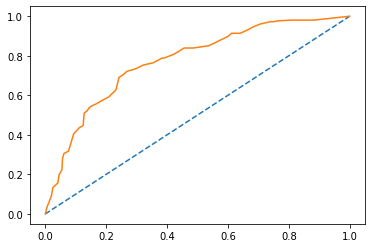

In [117]:
# predict probabilities
probs = dclf_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

<br/>

# <b>Random Forest</b>

In [155]:
ytrain_predict = rf_model.predict(x_train)
ytest_predict = rf_model.predict(x_test)

In [119]:
confusion_matrix(train_labels,ytrain_predict)

array([[1201,  142],
       [ 244,  415]], dtype=int64)

In [120]:
rf_train_acc=rf_model.score(x_train,train_labels) 
rf_train_acc

0.8071928071928072

In [121]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1343
           1       0.75      0.63      0.68       659

    accuracy                           0.81      2002
   macro avg       0.79      0.76      0.77      2002
weighted avg       0.80      0.81      0.80      2002



In [122]:
classification_report(train_labels, ytrain_predict,output_dict=True)

{'0': {'precision': 0.8311418685121107,
  'recall': 0.8942665673864483,
  'f1-score': 0.8615494978479197,
  'support': 1343},
 '1': {'precision': 0.7450628366247756,
  'recall': 0.629742033383915,
  'f1-score': 0.6825657894736842,
  'support': 659},
 'accuracy': 0.8071928071928072,
 'macro avg': {'precision': 0.7881023525684432,
  'recall': 0.7620043003851816,
  'f1-score': 0.772057643660802,
  'support': 2002},
 'weighted avg': {'precision': 0.8028071622115344,
  'recall': 0.8071928071928072,
  'f1-score': 0.8026332821543026,
  'support': 2002}}

In [123]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][1],2)
rf_train_recall=round(df.loc["1"][2],2)
rf_train_f1=round(df.loc["1"][0],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)
print('rf_train_acc',rf_train_acc)

rf_train_precision  0.63
rf_train_recall  0.68
rf_train_f1  0.75
rf_train_acc 0.8071928071928072


Area under Curve is 0.8758204459248595


Text(0.5, 1.0, 'ROC')

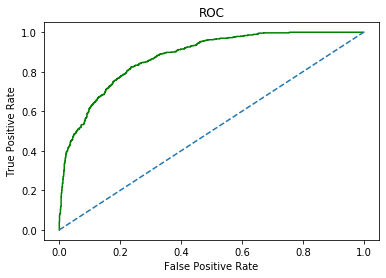

In [124]:
probs=rf_model.predict_proba(x_train)
probs=probs[:,1]
rf_train_auc=roc_auc_score(train_labels,probs)
print('Area under Curve is', rf_train_auc)
rf_train_fpr,rf_train_tpr,rf_thresholds=roc_curve(train_labels,probs)
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

In [156]:
confusion_matrix(test_labels,ytest_predict)

array([[521,  82],
       [112, 143]], dtype=int64)

In [157]:
rf_test_acc=rf_model.score(x_test,test_labels)
rf_test_acc

0.7738927738927739

In [158]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       603
           1       0.64      0.56      0.60       255

    accuracy                           0.77       858
   macro avg       0.73      0.71      0.72       858
weighted avg       0.77      0.77      0.77       858



In [159]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)
print('rf_test_acc',rf_test_acc)

rf_test_precision  0.64
rf_test_recall  0.56
rf_test_f1  0.6
rf_test_acc 0.7738927738927739


Area under Curve is 0.8048938314961143


Text(0.5, 1.0, 'ROC')

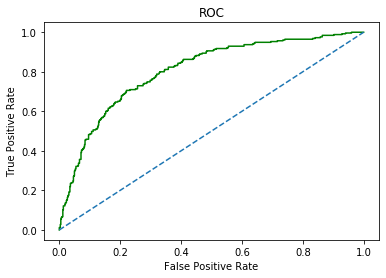

In [129]:
probs=rf_model.predict_proba(x_test)
probs=probs[:,1]
rf_test_auc=roc_auc_score(test_labels,probs)
print('Area under Curve is', rf_test_auc)
rf_test_fpr, rf_test_tpr,rf_thresholds=roc_curve(test_labels,probs)
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

<br/>

# <b>ANN model</b>

In [130]:
ytrain_predict = ann_model.predict(sc_x_train)
ytest_predict = ann_model.predict(sc_x_test)

In [131]:
confusion_matrix(train_labels,ytrain_predict)

array([[1183,  160],
       [ 309,  350]], dtype=int64)

In [132]:
nn_train_acc=ann_model.score(sc_x_train,train_labels) 
nn_train_acc

0.7657342657342657

In [133]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1343
           1       0.69      0.53      0.60       659

    accuracy                           0.77      2002
   macro avg       0.74      0.71      0.72      2002
weighted avg       0.76      0.77      0.76      2002



In [134]:
classification_report(train_labels, ytrain_predict,output_dict=True)

{'0': {'precision': 0.7928954423592494,
  'recall': 0.8808637379002234,
  'f1-score': 0.834567901234568,
  'support': 1343},
 '1': {'precision': 0.6862745098039216,
  'recall': 0.5311077389984825,
  'f1-score': 0.5988023952095808,
  'support': 659},
 'accuracy': 0.7657342657342657,
 'macro avg': {'precision': 0.7395849760815855,
  'recall': 0.705985738449353,
  'f1-score': 0.7166851482220744,
  'support': 2002},
 'weighted avg': {'precision': 0.7577989415830451,
  'recall': 0.7657342657342657,
  'f1-score': 0.7569607741264429,
  'support': 2002}}

In [135]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][1],2)
nn_train_recall=round(df.loc["1"][2],2)
nn_train_f1=round(df.loc["1"][0],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)
print('nn_train_acc',nn_train_acc)

nn_train_precision  0.53
nn_train_recall  0.6
nn_train_f1  0.69
nn_train_acc 0.7657342657342657


Area under Curve is 0.7059857384493529


Text(0.5, 1.0, 'ROC')

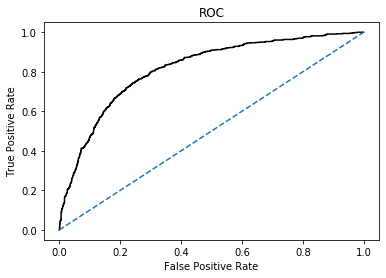

In [136]:
nn_train_auc=roc_auc_score(train_labels,ann_model.predict(sc_x_train))
print('Area under Curve is', nn_train_auc)
nn_train_fpr, nn_train_tpr,nn_threshold=roc_curve(train_labels,ann_model.predict_proba(sc_x_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

In [137]:
confusion_matrix(test_labels,ytest_predict)

array([[536,  67],
       [132, 123]], dtype=int64)

In [138]:
nn_test_acc=ann_model.score(sc_x_test,test_labels)
nn_test_acc

0.7680652680652681

In [139]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       603
           1       0.65      0.48      0.55       255

    accuracy                           0.77       858
   macro avg       0.72      0.69      0.70       858
weighted avg       0.76      0.77      0.76       858



In [140]:
classification_report(test_labels, ytest_predict,output_dict=True)

{'0': {'precision': 0.8023952095808383,
  'recall': 0.8888888888888888,
  'f1-score': 0.8434303697875689,
  'support': 603},
 '1': {'precision': 0.6473684210526316,
  'recall': 0.4823529411764706,
  'f1-score': 0.5528089887640449,
  'support': 255},
 'accuracy': 0.7680652680652681,
 'macro avg': {'precision': 0.7248818153167349,
  'recall': 0.6856209150326797,
  'f1-score': 0.6981196792758069,
  'support': 858},
 'weighted avg': {'precision': 0.7563208143888888,
  'recall': 0.7680652680652681,
  'f1-score': 0.7570568824204376,
  'support': 858}}

In [149]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)
print('nn_acc_test',nn_test_acc)

nn_test_precision  0.65
nn_test_recall  0.48
nn_test_f1  0.55
nn_acc_test 0.7680652680652681


Area under Curve is 0.6856209150326797


Text(0.5, 1.0, 'ROC')

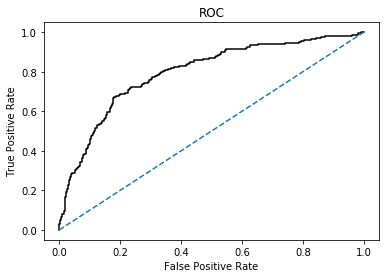

In [142]:
nn_test_auc=roc_auc_score(test_labels,ann_model.predict(sc_x_test))
print('Area under Curve is', nn_test_auc)
nn_test_fpr, nn_test_tpr,nn_thresholds=roc_curve(test_labels,ann_model.predict_proba(sc_x_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

<b>2.4 Final Model: Compare all the model and write an inference which model is best/optimized.</b>

In [143]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)

In [144]:
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.74,0.81,0.77,0.77,0.77
AUC,0.85,0.77,0.88,0.80,0.71,0.69
Recall,0.66,0.57,0.68,0.56,0.60,0.48
Precision,0.69,0.57,0.63,0.64,0.53,0.65
F1 Score,0.68,0.57,0.75,0.60,0.69,0.55


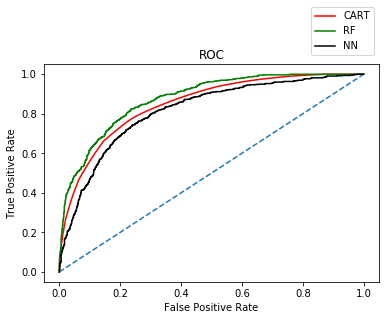

In [145]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

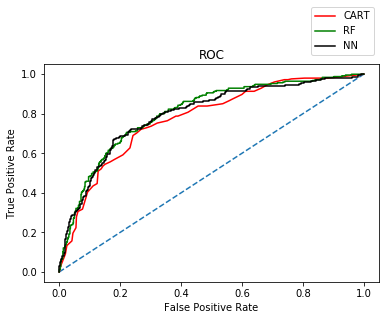

In [146]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')